In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import os
import matplotlib.pyplot as plt

In [260]:
def filter_tempdata(dataframe):
    temp_data = dataframe[12:]

    # change the column names
    temp_data.columns = ['frame_number', 'temp', 'confidence','eye_side']

    # reset index
    temp_data = temp_data.reset_index(drop=True)
    
    temp_data["frame_number"] = temp_data["frame_number"].astype(int)

    # remove last column
    temp_data = temp_data.drop(columns=['confidence'])
    
    print(temp_data['temp'].dtype)

    #convert temp_C to float
    temp_data['temp'] = temp_data['temp'].astype(str).str[:3]
    
    temp_data['temp'] = temp_data["temp"].replace("na", 0)
    
    
    temp_data['temp'] = temp_data["temp"].astype(int)
    
    
    
    return temp_data


In [441]:
def convert_string_to_float(my_string):
    return float("%s.%s" % (my_string[:2], my_string[1:]))

def filter_tempdata(dataframe):
    temp_data = dataframe[12:]

    # change the column names
    temp_data.columns = ['frame_number', 'temp', 'confidence','eye_side']

    # reset index
    temp_data = temp_data.reset_index(drop=True)
    
    temp_data["frame_number"] = temp_data["frame_number"].astype(int)

    # remove last column
    temp_data = temp_data.drop(columns=['confidence'])
    
    # remove missing rows
    temp_data['temp'] = temp_data["temp"].fillna(0)
    
    #convert temp to float for unifomity
    temp_data['temp'] = temp_data['temp'].astype(str)
    
    #remove "." decimals
    temp_data['temp'] = temp_data["temp"].str.replace(".", "")
    
    # remove missing rows
    temp_data['temp'] = temp_data["temp"].replace("na", 0)
    
    # convert back to float with 1 decimal point
    temp_data['temp'] = temp_data["temp"].apply(convert_string_to_float)
    
    # replace 0 with average
    avg = temp_data["temp"].replace(0, np.nan).mean()
    
    temp_data['temp'] = temp_data["temp"].replace(0, avg)
    
    return temp_data



In [442]:
file_path = "../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/High Res Thermal Camera/video_files/h6/"
arr = os.listdir(file_path)

In [443]:
files = [file for file in arr if file.endswith('.csv')]
print(files)

['rec_0012.avi.csv', 'rec_0013.avi.csv', 'rec_0014.avi.csv', 'rec_0015.avi.csv', 'rec_0016.avi.csv', 'rec_0017.avi.csv', 'rec_0018.avi.csv', 'rec_0019.avi.csv', 'rec_0020.avi.csv']


In [444]:
data = list()
for i in files:
    data.append(filter_tempdata(pd.read_csv(file_path+i)))

C:\Users\manup\AppData\Local\Temp\ipykernel_14324\1824567202.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_data['temp'] = temp_data["temp"].str.replace(".", "")
C:\Users\manup\AppData\Local\Temp\ipykernel_14324\1824567202.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_data['temp'] = temp_data["temp"].str.replace(".", "")
C:\Users\manup\AppData\Local\Temp\ipykernel_14324\1824567202.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_data['temp'] = temp_data["temp"].str.replace(".", "")
C:\User

In [445]:
data

[      frame_number   temp eye_side
 0               14  34.48    other
 1               15  34.48    other
 2               16  34.48    other
 3               17  34.48    other
 4               18  34.48    other
 ...            ...    ...      ...
 1951          1965  32.29    other
 1952          1966  33.32    other
 1953          1967  33.33    other
 1954          1968  33.35    other
 1955          1969  33.38    other
 
 [1956 rows x 3 columns],
      frame_number      temp eye_side
 0              14  35.52000    other
 1              15  35.52000    other
 2              16  35.52000    other
 3              17  35.52000    other
 4              18  34.83923    other
 ..            ...       ...      ...
 972           986  32.26000    other
 973           987  32.26000    other
 974           988  32.26000    other
 975           989  32.25000    other
 976           990  32.25000    other
 
 [977 rows x 3 columns],
       frame_number   temp eye_side
 0               14  

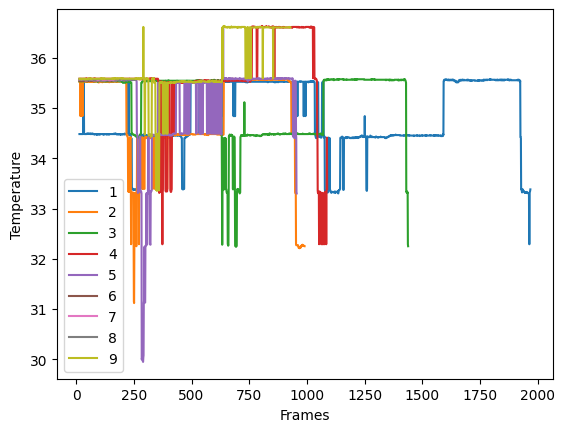

In [446]:
stage = 0
for i in data:
    plt.plot(i["frame_number"],i['temp'], label= stage+1)
    stage = stage +1

plt.legend()
plt.xlabel("Frames")
plt.ylabel("Temperature")
plt.show()

In [447]:
data[1]

,frame_number,temp,eye_side
0,14,35.52000,other
1,15,35.52000,other
2,16,35.52000,other
3,17,35.52000,other
4,18,34.83923,other
...,...,...,...
972,986,32.26000,other
973,987,32.26000,other
974,988,32.26000,other
975,989,32.25000,other
